# 金庸的武侠世界

金庸老爷子一共写了15部武侠小说，它们分别是：

- 《飞狐外传》（1960年）
- 《雪山飞狐》（1959年）
- 《连城诀》（1963年）
- 《天龙八部》（1963年）
- 《射雕英雄传》（1957年）
- 《白马啸西风》（1961年）
- 《鹿鼎记》（1969年）
- 《笑傲江湖》（1967年）
- 《书剑恩仇录》（1955年）
- 《神雕侠侣》（1959年）
- 《侠客行》（1965年）
- 《倚天屠龙记》（1961年）
- 《碧血剑》（1956年）
- 《鸳鸯刀》（1961年）
- 《越女剑》（1970年）

我们现在就用 `Python` 来探索一下金庸小说中的武侠世界吧。

## 准备工作

再处理小说之前，我们需要先做一些准备工作。

因为涉及中文字符，所以我们使用 `__future__` 中 Python 3 的特性，将所有的字符串转为 `unicode`。

In [90]:
from __future__ import unicode_literals

再来我们解决图像里中文字符显示的问题，Matplotlib虽然支持 `unicode` 编码，但是直接输出中文字体会出现问题。下面是从网上找到的解决方案

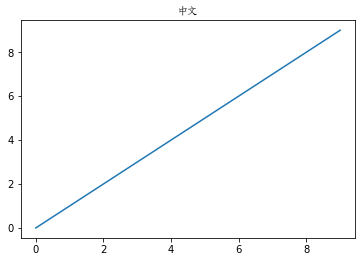

In [93]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline
# matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
# matplotlib.rcParams['axes.unicode_minus'] = False


font=FontProperties(fname='/Library/Fonts/fangsong.ttf',size=10)

x = range(10)
plt.plot(x)
plt.title("中文",fontproperties=font)
plt.show()

In [94]:
ls /Library/Fonts

Al Nile.ttc                      Mishafi Gold.ttf
Al Tarikh.ttc                    Mishafi.ttf
AlBayan.ttc                      Mshtakan.ttc
AmericanTypewriter.ttc           Muna.ttc
Andale Mono.ttf                  Myanmar MN.ttc
Apple Chancery.ttf               Myanmar Sangam MN.ttc
AppleGothic.ttf                  NISC18030.ttf
AppleMyungjo.ttf                 Nadeem.ttc
Arial Black.ttf                  NewPeninimMT.ttc
Arial Bold Italic.ttf            Oriya MN.ttc
Arial Bold.ttf                   Oriya Sangam MN.ttc
Arial Italic.ttf                 PTMono.ttc
Arial Narrow Bold Italic.ttf     PTSans.ttc
Arial Narrow Bold.ttf            PTSerif.ttc
Arial Narrow Italic.ttf          PTSerifCaption.ttc
Arial Narrow.ttf                 Papyrus.ttc
Arial Rounded Bold.ttf           Phosphate.ttc
Arial Unicode.ttf                PlantagenetCherokee.ttf
Arial.ttf                        Raanana.ttc
Athelas.ttc                      Rockwell.ttc
Ayuthaya.ttf                     STIXGeneral.otf


## 小说概览

我们从网上找到金庸小说的 txt 全文，放在 `novels` 文件夹中：

In [95]:
!ls novels

侠客行.txt          鸳鸯刀.txt          笑傲江湖.txt        倚天屠龙记.txt
碧血剑.txt          鹿鼎记.txt          雪山飞狐.txt        射雕英雄传.txt
越女剑.txt          天龙八部.txt        飞狐外传.txt        白马啸西风.txt
连城诀.txt          神雕侠侣.txt        书剑恩仇录.txt


先一睹为快：

In [96]:
with open('novels/鸳鸯刀.txt','rb') as f:
    # 去掉结尾的换行符
    data = [line.strip().decode('GB18030') for line in f.readlines()]

for line in data[:13]:
    if line.strip():
        print (line)

　　四个劲装结束的汉子并肩而立，拦在当路！
　　若是黑道上山寨的强人，不会只有四个，莫非在这黑沈沈的松林之中，暗中还埋伏
　　下大批人手？如是剪径的小贼，见了这麽声势浩大的镖队，远避之唯恐不及，哪敢这般
　　大模大样的拦路挡道？难到竟是武林高手，冲著自己而来？


## 出场人物

接着，我们先找到金庸小说中所有出场的人物，放到 names.txt 文件中，其格式为：

```
小说1
人物1 人物2 ……
小说2
人物1 人物2 ……
小说3
人物1 人物2 ……
……
```

In [97]:
with open('names.txt') as f:
    # 去掉结尾的换行符
    data = [line.strip() for line in f.readlines()]

novels = data[::2]
names = data[1::2]

novel_names = {k: v.split() for k, v in zip(novels, names)}

for name in novel_names['雪山飞狐'][:20]:
    print (name)

于管家
田青文
左书僮
右书僮
平阿四
阮士忠
刘元鹤
杜希孟
周云阳
郑三娘
宝树
苗若兰
苗人凤
范帮主
殷吉
胡一刀
胡夫人
胡斐
陶子安
陶百岁


## 寻找主角光环

我们来看看人物在小说中的出场次数统计。

显然出场次数越多，自然主角光环越强，我们定义一个函数寻找小说中主角光环最强的几个人：

In [108]:
def find_main_charecters(novel, num=10):
    with open('novels/{}.txt'.format(novel),"rb") as f:
        data = f.read().decode('GB18030')
    count = []
    for name in novel_names[novel]:
        count.append([name, data.count(name)])
    count.sort(key=lambda x: x[1])
    _, ax = plt.subplots()
    
    numbers = [x[1] for x in count[-num:]]
    names = [x[0] for x in count[-num:]]
    from matplotlib.pylab import style
#     style.use('ggplot')    
    plt.rcParams['axes.unicode_minus'] = False
    ax.barh(range(num), numbers, color='red', align='center')
    ax.set_title(novel, fontsize=10, fontproperties=font)
    ax.set_yticks(range(num))
    print(names)
    ax.set_yticklabels(names, fontsize=10, fontproperties=font)

天龙八部：

['范帮主', '田青文', '陶子安', '刘元鹤', '苗人凤', '胡一刀', '苗若兰', '宝树', '曹云奇', '胡斐']



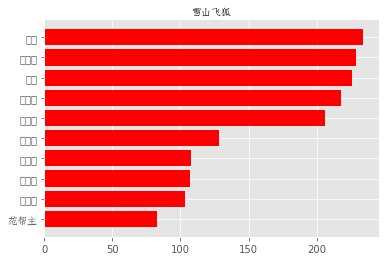

In [109]:
font=FontProperties(fname='/Library/Fonts/fangsong.ttf',size=10)
from matplotlib.font_manager import _rebuild
_rebuild() #reload一下
find_main_charecters("雪山飞狐")
print()

['常长风', '逍遥子', '盖一鸣', '萧半和', '任飞燕', '林玉龙', '袁冠南', '周威信', '卓天雄', '萧中慧']


/Users/Tyler/anaconda3/envs/tf2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36877 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Tyler/anaconda3/envs/tf2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36965 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Tyler/anaconda3/envs/tf2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30422 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Tyler/anaconda3/envs/tf2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 40483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Tyler/anaconda3/envs/tf2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33831 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Tyler/anaconda3/envs/tf2/lib/pyth

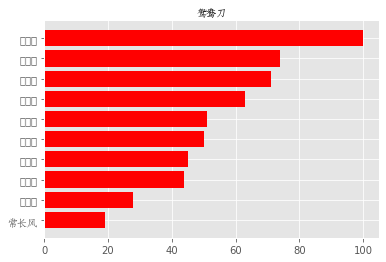

In [110]:
# find_main_charecters("越女剑")
# find_main_charecters("连城诀")
find_main_charecters("鸳鸯刀")

## Word2Vec

接下来，我们将使用一些机器学习的观点来处理这些小说。

`Word2Vec` 是一款将词表征为实数值向量的高效工具，原理就不过多介绍了，感兴趣的可以自行搜索，

`gensim` 包提供了一个 `Python` 版的实现。

- 源代码地址：https://github.com/RaRe-Technologies/gensim
- 官方文档地址：http://radimrehurek.com/gensim/

首先安装 `gensim`：

    pip install gensim
    
安装完成之后，导入这个包：

In [ ]:
import gensim

## 中文分词

虽然我们安装了 `gensim`，但我们还不可以直接使用它来进行 `Word2Vec` 的操作，因为 `Word2Vec` 中的词默认是用空格分隔的，而中文小说显然不符合这个要求，为此，我们需要对中文进行分词。

一个比较好用的 `Python` 中文分词包叫做 `jieba` （结巴）。

- 源代码地址：https://github.com/fxsjy/jieba

安装 jieba：
    
    pip install jieba
    
导入：

In [ ]:
import jieba

`jieba` 包具有识别新词的能力，不过为了得到更准确的分词结果，我们可以将人名导入 `jieba` 库的字典，除此之外，我们还加入门派和武功的专有名词：

In [ ]:
for _, names in novel_names.iteritems():
    for name in names:
        jieba.add_word(name)
        
with open("kungfu.txt") as f:
    kungfu_names = [line.decode('utf8').strip() for line in f.readlines()]
    
with open("bangs.txt") as f:
    bang_names = [line.decode('utf8').strip() for line in f.readlines()]

for name in kungfu_names:
    jieba.add_word(name)

for name in bang_names:
    jieba.add_word(name)

我们按照段落处理文本：

In [ ]:
novels = ["书剑恩仇录", 
          "天龙八部",
          "碧血剑",
          "越女剑",
          "飞狐外传",
          "侠客行",
          "射雕英雄传",
          "神雕侠侣",
          "连城诀",
          "鸳鸯刀",
          "倚天屠龙记",
          "白马啸西风",
          "笑傲江湖",
          "雪山飞狐",
          "鹿鼎记"]

sentences = []

for novel in novels:
    print "处理：{}".format(novel)
    with open('novels/{}.txt'.format(novel)) as f:
        data = [line.decode('utf8').strip() for line in f.readlines() if line.decode('utf8').strip()]
    for line in data:
        words = list(jieba.cut(line))
        sentences.append(words)

## 训练模型

默认参数进行训练：

In [ ]:
model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

我们可以把训练好的模型存到本地：

In [ ]:
model.save("louis_cha.model")

从本地磁盘上读取模型：

In [ ]:
model = gensim.models.Word2Vec.load("louis_cha.model")

## 相似度结果

有了模型，我们可以进行一些简单而有趣的测试。

首先看与乔峰相似的人：

In [ ]:
for k, s in model.most_similar(positive=["乔峰", "萧峰"]):
    print k, s

出来的都是出场较多的男性人物。

再看看与阿朱相似的人：

In [ ]:
for k, s in model.most_similar(positive=["阿朱"]):
    print k, s

这回出现的是一群女性角色。

除了人物，我们可以看看门派：

In [ ]:
for k, s in model.most_similar(positive=["丐帮"]):
    print k, s

这个出来的结果就是一堆门派。

还可以看看武功秘籍：

In [ ]:
for k, s in model.most_similar(positive=["降龙十八掌"]):
    print k, s

在 Word2Vec 的模型里，有过“中国-北京=法国-巴黎”的例子，这里我们也可以找到这样的例子：

In [ ]:
def find_relationship(a, b, c):
    """
    返回 d
    a与b的关系，跟c与d的关系一样
    """
    d, _ = model.most_similar(positive=[c, b], negative=[a])[0]
    print "给定“{}”与“{}”，“{}”和“{}”有类似的关系".format(a, b, c, d)

find_relationship("段誉", "段公子", "乔峰")

类似的：

In [ ]:
# 情侣对
find_relationship("郭靖", "黄蓉", "杨过")

# 岳父女婿
find_relationship("令狐冲", "任我行", "郭靖")

# 非情侣
find_relationship("郭靖", "华筝", "杨过")

以及，小宝你是有多爱男人：

In [ ]:
# 韦小宝
find_relationship("杨过", "小龙女", "韦小宝")
find_relationship("令狐冲", "盈盈", "韦小宝")
find_relationship("张无忌", "赵敏", "韦小宝")

除了人物之间的关系，门派武功之间的关系：

In [ ]:
find_relationship("郭靖", "降龙十八掌", "黄蓉")
find_relationship("武当", "张三丰", "少林")
find_relationship("任我行", "魔教", "令狐冲")

## 人物聚类分析

之前我们对文本进行 `Word2Vec` 的结果，是将一个中文词组，映射到了一个向量空间，因此，我们可以利用这个向量表示的空间，对这些词进行聚类分析。

因为全部小说中的人物太多，我们考虑从单本小说进行入手：

In [ ]:
all_names = []
word_vectors = None

for name in novel_names["天龙八部"]:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

### KMeans

聚类我们可以使用很多方法，这里我们用 scikit-learn 自带的几种聚类方法进行聚类。

先考虑 Kmeans：

In [ ]:
from sklearn.cluster import KMeans

如果只分成3类，那么很明显地可以将众人分成主角，配角，跑龙套的三类：

In [ ]:
N = 3
label = KMeans(N).fit(word_vectors).labels_

for c in range(N):
    print "\n类别{}：".format(c+1)
    for idx, name in enumerate(all_names[label==c]):
        print name,
        if idx % 10 == 9:
            print 
    print

我们把众龙套去掉：

In [ ]:
N = 4
c = sp.stats.mode(label).mode
remain_names = all_names[label!=c]
remain_vectors = word_vectors[label!=c]

remain_label = KMeans(N).fit(remain_vectors).labels_

for c in range(N):
    print "\n类别{}：".format(c+1)
    for idx, name in enumerate(remain_names[remain_label==c]):
        print name,
        if idx % 10 == 9:
            print 
    print

可以看到，段家的儿子和女儿倾向于聚在一起，而反派角色则倾向于被聚在一起。

### 层级聚类

换一本小说：

In [ ]:
all_names = []
word_vectors = None

for name in novel_names["倚天屠龙记"]:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

这次采用层级聚类的方式，调用的是 `Scipy` 中层级聚类的包：

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 40))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], fontproperties=font_yahei_consolas)
ax.set_frame_on(False)

plt.show()

来看红色聚类区的上半部分：

与张教主相关的人物：两个女人，赵敏和周芷若；父母和义父。

而红色聚类区的下半部分主要是明教与武当中与张无忌相关的部分。

### 门派和武功

除了人物，我们还可以考虑对武功进行聚类分析：

In [ ]:
all_names = []
word_vectors = None
for name in kungfu_names:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 35))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], fontproperties=font_yahei_consolas)
ax.set_frame_on(False)

plt.show()

可以认为，一部分是主角比较厉害的武功，比较多的那部分只能算是配角们的武功。

再来就是门派的聚类：

In [ ]:
all_names = []
word_vectors = None
for name in bang_names:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 25))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], fontproperties=font_yahei_consolas)
ax.set_frame_on(False)

plt.show()

比较少的这一类，基本都是在某几部小说中出现的主要门派，而大多数门派都是打酱油的。

## 总结

> 飞雪连天射白鹿，笑书神侠倚碧鸳。

<p align=center><img src="http://d.hiphotos.baidu.com/baike/pic/item/cf1b9d16fdfaaf5120f00f5c8e5494eef11f7ac6.jpg", width='30%'></p>